=== THERMAL LOAD FORECASTING ===

RMSE Rolling Avg: 37.8 kW
RMSE Linear Reg:  24.9 kW


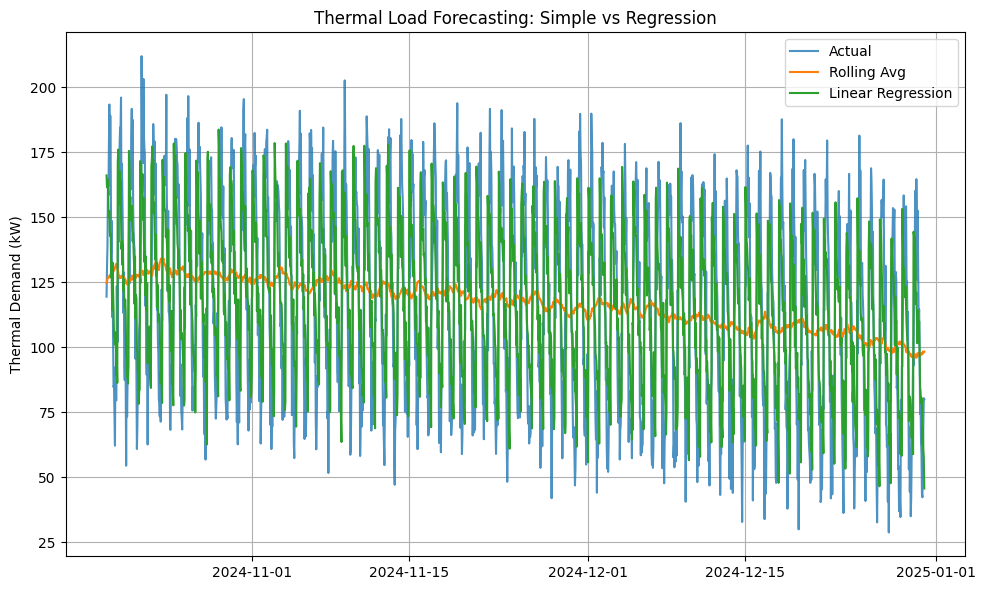


Forecasting analysis complete.


In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

print("=== THERMAL LOAD FORECASTING ===\n")

# Load data
df = pd.read_csv('hourly_heat_demand.csv', parse_dates=['timestamp'])
df.set_index('timestamp', inplace=True)

# Simple baseline methods
df['rolling_24h'] = df['demand_kW'].shift(24).rolling(24).mean()
df['weekly_avg'] = df['demand_kW'].rolling(168).mean()

# Regression-based approach
X = df[['temp_C', 'hour']].dropna()
y = df['demand_kW'].loc[X.index]

split = int(0.8 * len(X))
X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Performance comparison
rmse_roll = np.sqrt(mean_squared_error(y_test, df['rolling_24h'].loc[y_test.index]))
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"RMSE Rolling Avg: {rmse_roll:.1f} kW")
print(f"RMSE Linear Reg:  {rmse_lr:.1f} kW")

# Visualization
plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test, label='Actual', alpha=0.8)
plt.plot(y_test.index, df['rolling_24h'].loc[y_test.index], label='Rolling Avg')
plt.plot(y_test.index, y_pred_lr, label='Linear Regression')
plt.legend()
plt.ylabel("Thermal Demand (kW)")
plt.title("Thermal Load Forecasting: Simple vs Regression")
plt.grid(True)
plt.tight_layout()
plt.savefig("thermal_load_forecast.png", dpi=300)
plt.show()

print("\nForecasting analysis complete.")
